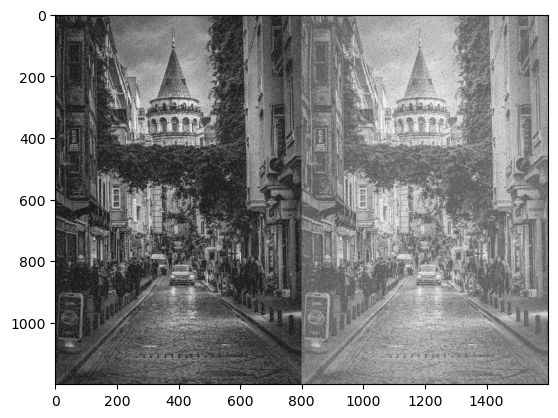

In [38]:
#1)Gamma Dönüşümü 
import cv2
import numpy as np
from matplotlib import pyplot as plt

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)


img = cv2.imread('test.jpg')
gammaImg = gammaCorrection(img, 2.2)

res = np.hstack((img,gammaImg))
plt.imshow(res)
plt.show()

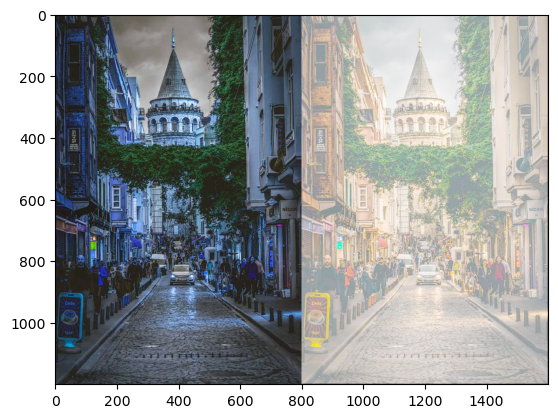

In [15]:
#2)logarithmic transformation 

 

# import Pillow modules

from PIL import Image

from PIL import ImageFilter

import math

 

# Compute log

def logTransform(c, f):

    g = c * math.log(float(1 + f),10);

    return g;

 

# Apply logarithmic transformation for an image

def logTransformImage(image, outputMax = 255, inputMax=255):

    c = outputMax/math.log(inputMax+1,10);



    # Read pixels and apply logarithmic transformation

    for i in range(0, img.size[0]-1):

        for j in range(0, img.size[1]-1):

            # Get pixel value at (x,y) position of the image

            f = img.getpixel((i,j));



            # Do log transformation of the pixel

            redPixel    = round(logTransform(c, f[0]));

            greenPixel  = round(logTransform(c, f[1]));

            bluePixel   = round(logTransform(c, f[2]));

 

            # Modify the image with the transformed pixel values

            img.putpixel((i,j),(redPixel, greenPixel, bluePixel));

 

    return image;



# Display the original image

imageFileName = "test.jpg";

img = Image.open(imageFileName);


img1 = cv.imread("test.jpg")

# Display the image after applying the logarithmic transformation

logTransformedImage = logTransformImage(img);

res = np.hstack((img1,logTransformedImage))
plt.imshow(res)
plt.show()

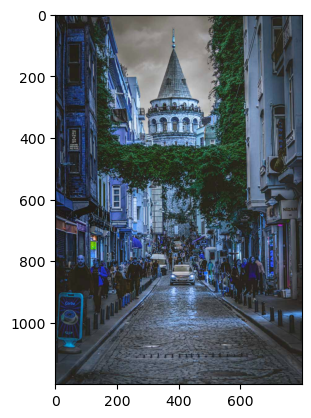

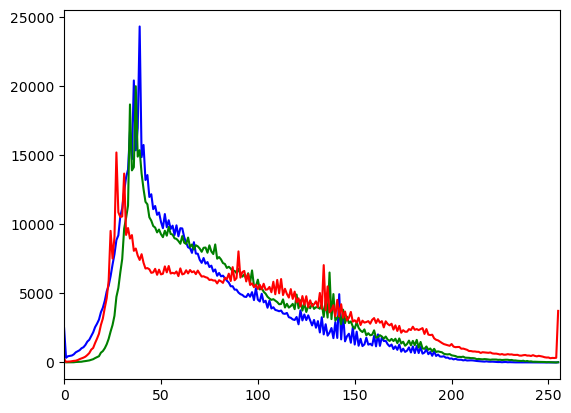

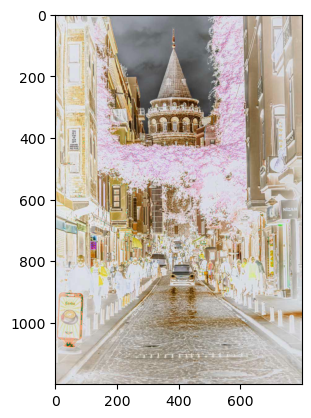

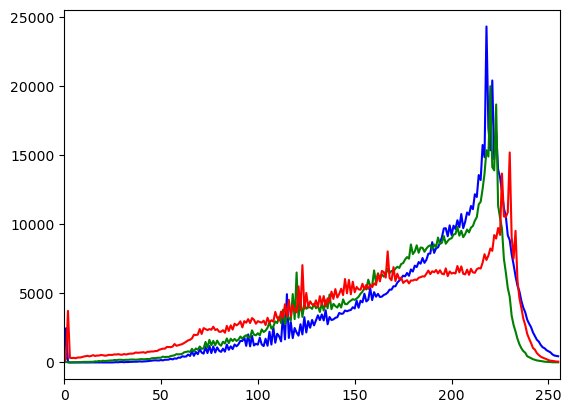

In [19]:
#3) Negatifini alma

import cv2
import matplotlib.pyplot as plt
  
  
# Read an image
img_bgr = cv2.imread('test.jpg', 1)
  
plt.imshow(img_bgr)
plt.show()
  
# Histogram plotting of original image
color = ('b', 'g', 'r')
  
for i, col in enumerate(color):
      
    histr = cv2.calcHist([img_bgr],
                         [i], None,
                         [256],
                         [0, 256])
      
    plt.plot(histr, color = col)
      
    # Limit X - axis to 256
    plt.xlim([0, 256])
      
plt.show()
  
# Negate the original image
img_neg = 1 - img_bgr
  
plt.imshow(img_neg)
plt.show()
  
# Histogram plotting of
# negative transformed image
color = ('b', 'g', 'r')
  
for i, col in enumerate(color):
      
    histr = cv2.calcHist([img_neg],
                         [i], None, 
                         [256],
                         [0, 256])
      
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
      
plt.show()

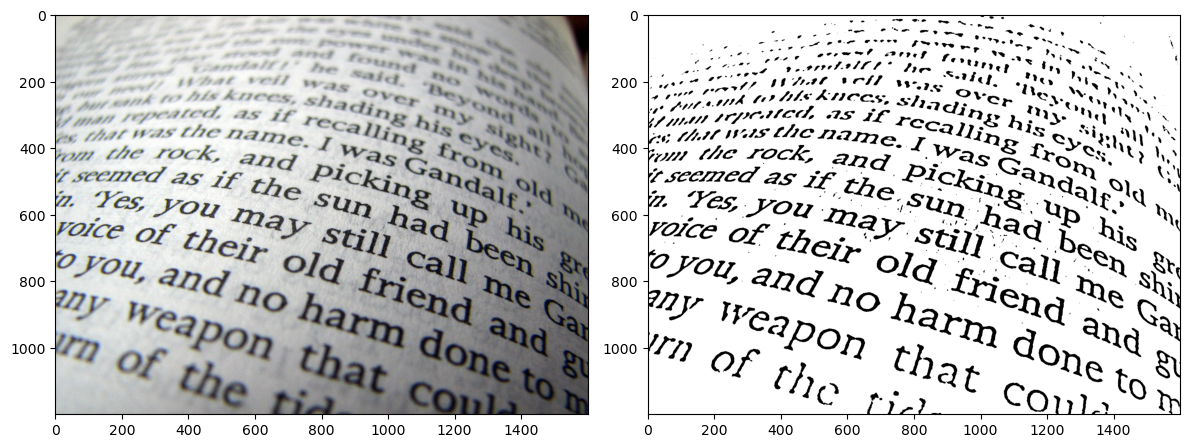

In [39]:
#4)Üzerinde metin olan resmin yazılarını netleştirme 
import cv2
import matplotlib.pyplot as plt

# Read and prepare image
img = cv2.imread('test2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# Apply adaptive thresholding
mask = cv2.adaptiveThreshold(blurred, 
                              255, 
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                              cv2.THRESH_BINARY, 
                              31, 
                              10)

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.tight_layout()

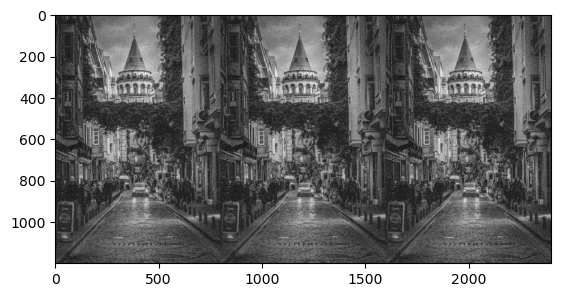

In [42]:
#5)Gri ölçekli resmi 8,16,24 bite çevir 
img = cv2.imread('test.jpg')
img8 = img.astype('uint8')
img16 = img.astype('uint16')
#img24 = img.astype('uint24')
res = np.hstack((img,img8,img16))
plt.imshow(res)
plt.show()

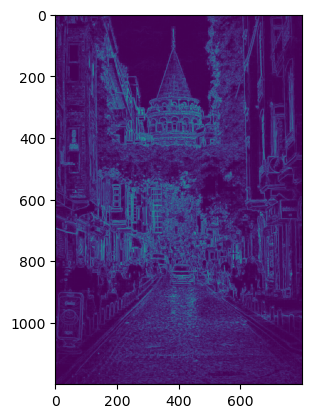

In [15]:
#6)Sobel - Prewitt - Robert cross filtreleme 

import cv2 
import numpy as np
from scipy import ndimage
  
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
img = cv2.imread('test.jpg',0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
cv2.imwrite("output.jpg",edged_img)
plt.imshow(edged_img)
plt.show()

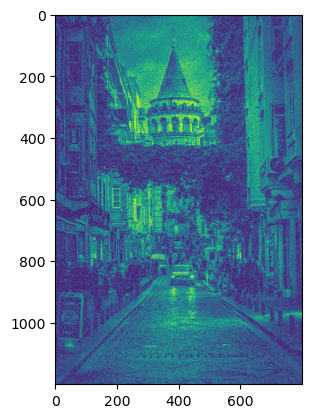

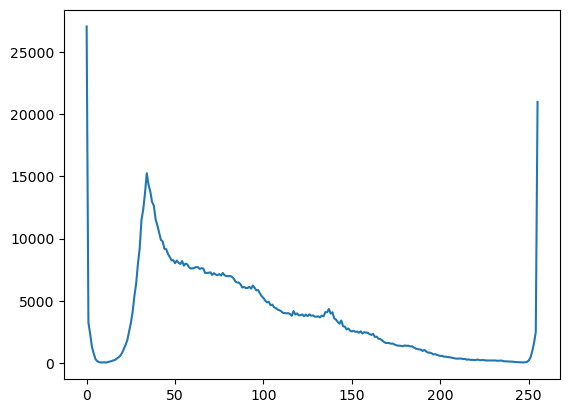

In [40]:
#7)Tuz biber görüntü oluştur ve histogram çıkarma
import random
import cv2
 
def add_noise(img):
 
    # Getting the dimensions of the image
    row , col = img.shape
     
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to white
        img[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        img[y_coord][x_coord] = 0
         
    return img
 
# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('test.jpg',cv2.IMREAD_GRAYSCALE)
 
#Storing the image
cv2.imwrite('salt-and-pepper-test.jpg',add_noise(img))
noise=add_noise(img)
plt.imshow(noise)
plt.show()
# find frequency of pixels in range 0-255
histr = cv2.calcHist([img],[0],None,[256],[0,256])
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()